In [59]:
import os
import numpy as np
import pandas as pd

In [2]:
data = [
    {'a': 1, 'b': 1, 'c': 1}
    ,{'a': 2, 'b': 2, 'c': 2}
    ,{'a': 3, 'b': 3, 'c': 3}
]
data_df = pd.DataFrame(data)

In [3]:
data_df

,a,b,c
0,1,1,1
1,2,2,2
2,3,3,3


In [7]:
data_df.drop(['c'], axis=1, inplace=True)

In [8]:
data_df

,a,b
0,1,1
1,2,2
2,3,3


In [15]:
data_df.isna().sum()

a    0
b    0
dtype: int64

In [16]:
data_df.dropna()

,a,b
0,1,1
1,2,2
2,3,3


In [38]:
data = [
    {'a': '20250825', 'b': '2025-08-25', 'c': '25aug2025'}
    ,{'a': '20240825', 'b': '2024-08-25', 'c': '25aug2025'}
]
data_df = pd.DataFrame(data)

In [39]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       2 non-null      object
 1   b       2 non-null      object
 2   c       2 non-null      object
dtypes: object(3)
memory usage: 180.0+ bytes


In [40]:
data_df['a'] = pd.to_datetime(data_df['a'])
data_df['b'] = pd.to_datetime(data_df['b'])
data_df['c'] = pd.to_datetime(data_df['c'], format="%d%b%Y")

In [41]:
data_df

,a,b,c
0,2025-08-25,2025-08-25,2025-08-25
1,2024-08-25,2024-08-25,2025-08-25


In [53]:
data = [
    {'a': 0.08, 'b': 0.13, 'c': 0.09}
    ,{'a': 0.7, 'b': 0.13, 'c': 0.46}
    ,{'a': 3.79, 'b': 4.3, 'c': 2.86}
]
data_df = pd.DataFrame(data)

In [54]:
data_df.corr(numeric_only=True)

,a,b,c
a,1.000000,0.987759,0.999446
b,0.987759,1.000000,0.992405
c,0.999446,0.992405,1.000000


In [55]:
data = [
    {'a': 0.08, 'b': 0.13, 'c': 0.09}
    ,{'a': 0.7, 'b': 0.13, 'c': 0.46}
    ,{'a': 3.79, 'b': 4.3, 'c': 2.86}
]
data_df = pd.DataFrame(data)

In [56]:
melted_data_df = data_df.select_dtypes(include='number').melt(var_name='Feature', value_name='Value')

In [57]:
melted_data_df

,Feature,Value
0,a,0.08
1,a,0.70
2,a,3.79
3,b,0.13
4,b,0.13
5,b,4.30
6,c,0.09
7,c,0.46
8,c,2.86


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

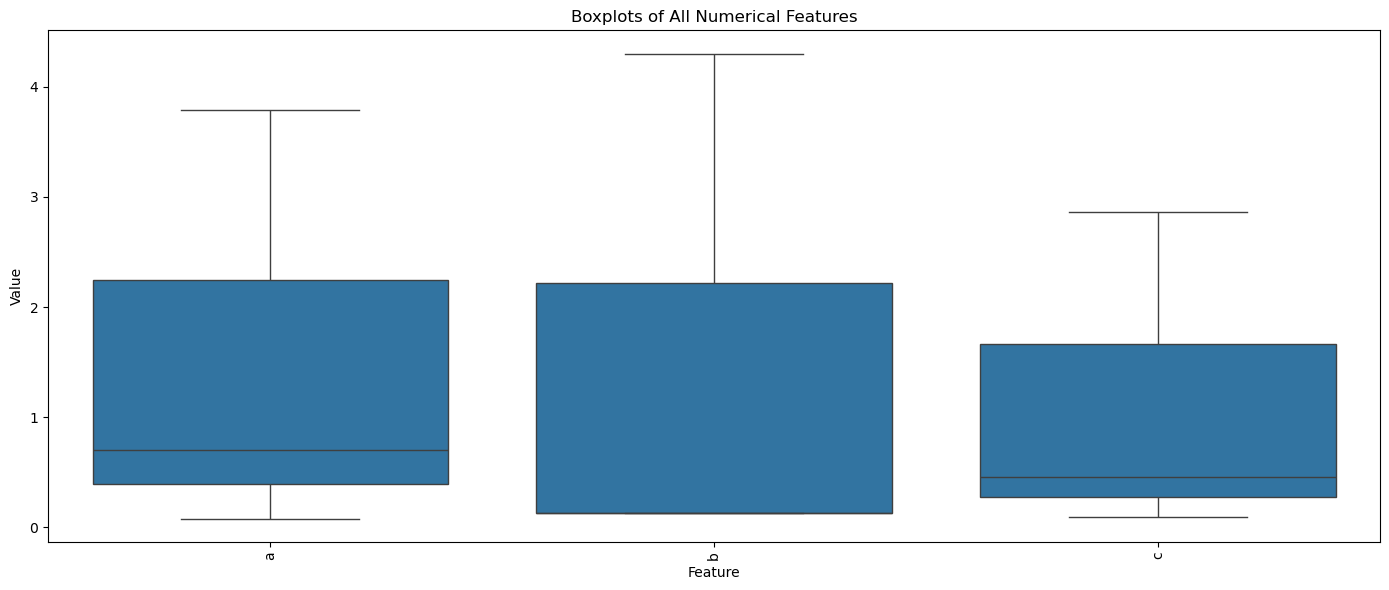

In [64]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Feature', y='Value', data=melted_data_df)
plt.xticks(rotation=90)
plt.title("Boxplots of All Numerical Features")
plt.tight_layout()
plt.show()

In [65]:
numeric_data_df = data_df.select_dtypes(include='number')

In [70]:
Q1 = numeric_data_df.quantile(0.25)
Q3 = numeric_data_df.quantile(0.75)
IQR = Q3 - Q1

In [71]:
IQR

a    1.855
b    2.085
c    1.385
dtype: float64

In [74]:
numeric_data_df < (Q1 - 1.5 * IQR)

,a,b,c
0,False,False,False
1,False,False,False
2,False,False,False


In [72]:
outliers = (numeric_data_df < (Q1 - 1.5 * IQR)) | (numeric_data_df > (Q3 + 1.5 * IQR))

In [73]:
outliers

,a,b,c
0,False,False,False
1,False,False,False
2,False,False,False
